In [2]:
pip install numpy matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


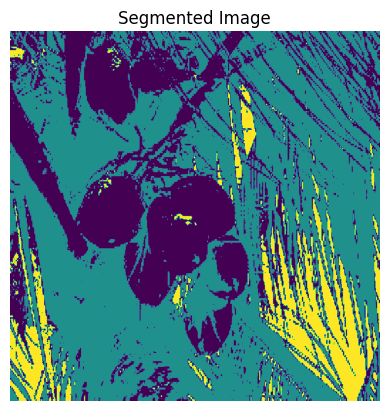

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.convert('RGB')  # Convert to RGB if necessary
        img = np.array(img)
        images.append(img)
    return images

# Replace 'train', 'test', and 'valid' with your actual folder names
train_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/train'
test_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/test'
valid_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/valid'

# Load images from each folder
train_images = load_images_from_folder(train_folder)
test_images = load_images_from_folder(test_folder)
valid_images = load_images_from_folder(valid_folder)

# Concatenate images into a single array
train_images_reshaped = [img.reshape((-1, 3)) for img in train_images]
all_images = np.concatenate(train_images_reshaped)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(all_images)

# Segment a specific image (e.g., the first test image)
test_image = test_images[0]

# Get the height and width of the test image
height, width, _ = test_image.shape

# Predict cluster labels for each pixel
predicted_labels = kmeans.predict(test_image.reshape((-1, 3)))

# Reshape the predicted labels back to the original spatial dimensions (height, width)
segmented_image = predicted_labels.reshape((height, width))

# Display the segmented image
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


In [1]:
!pip install librosa


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
pip install librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.0-cp310-cp310-manylinux_2_1

In [2]:
pip install pyaudioanalysis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 2.5 MB/s eta 0:00:00a 0:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudioanalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41411605 sha256=7b8567896400c292bb1e24d3e5c6f5b8785effbcfad430d5cdc9f57382423ccb
  Stored in directory: /home/ashwathama/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyaudioanalysis
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install eyed3 pydub matplotlib tqdm

Note: you may need to restart the kernel to use updated packages.


In [11]:
import librosa
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import numpy as np

# Load audio with librosa
audio_path = "your_audio_file.wav"
y, sr = librosa.load(audio_path, sr=None)

# Librosa Features (MFCC, Chroma, etc.)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)

# Load audio with pyAudioAnalysis
[Fs, x] = audioBasicIO.read_audio_file(audio_path)
short_term_features, _ = ShortTermFeatures.feature_extraction(x, Fs, 0.050, 0.025)

# Combine features from both sources
combined_features = np.concatenate((mfccs.flatten(), chroma.flatten(), zcr.flatten(), short_term_features.flatten()))

print(combined_features)


/tmp/ipykernel_350173/571637778.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/ashwathama/Documents/GitHub/agritech/.venv/lib64/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'your_audio_file.wav'